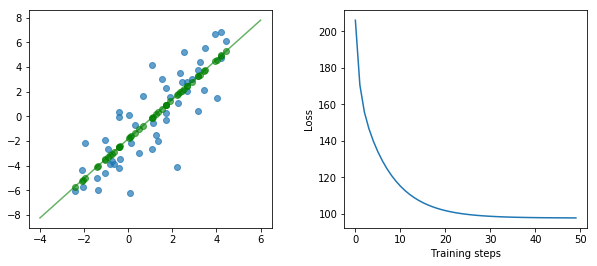

In [2]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
# Add random noise (gaussian, mean 0, stdev 1)
X += np.random.randn(2, num_examples)
# Split into x and y
x, y = X
# Add the bias node which always has a value of 1
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

# Keep track of the loss at each iteration so we can chart it later
losses = []
# How many iterations to run our training
training_steps = 50
# The learning rate. Also known has the step size. This changes how far
# we move down the gradient toward lower error at each step. Too large
# jumps risk inaccuracy, too small slow the learning.
learning_rate = 0.002

# In TensorFlow, we need to run everything in the context of a session.
with tf.Session() as sess:
    # Set up all the tensors.
    # Our input layer is the x value and the bias node.
    input = tf.constant(x_with_bias)
    # Our target is the y values. They need to be massaged to the right shape.
    target = tf.constant(np.transpose([y]).astype(np.float32))
    # Weights are a variable. They change every time through the loop.
    # Weights are initialized to random values (gaussian, mean 0, stdev 0.1)
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    # Initialize all the variables defined above.
    tf.global_variables_initializer().run()

    # Set up all operations that will run in the loop.
    # For all x values, generate our estimate on all y given our current
    # weights. So, this is computing y = w2 * x + w1 * bias
    yhat = tf.matmul(input, weights)
    # Compute the error, which is just the difference between our 
    # estimate of y and what y actually is.
    yerror = tf.subtract(yhat, target)
    # We are going to minimize the L2 loss. The L2 loss is the sum of the
    # squared error for all our estimates of y. This penalizes large errors
    # a lot, but small errors only a little.
    loss = tf.nn.l2_loss(yerror)

    # Perform gradient descent. 
    # This essentially just updates weights, like weights -= grads * learning_rate
    # using the partial derivative of the loss with respect to the
    # weights. It's the direction we want to go to move toward lower error.
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # At this point, we've defined all our tensors and run our initialization
    # operations. We've also set up the operations that will repeatedly be run
    # inside the training loop. All the training loop is going to do is 
    # repeatedly call run, inducing the gradient descent operation, which has the effect of
    # repeatedly changing weights by a small amount in the direction (the
    # partial derivative or gradient) that will reduce the error (the L2 loss).
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        sess.run(update_weights)

        # Here, we're keeping a history of the losses to plot later
        # so we can see the change in loss as training progresses.
        losses.append(loss.eval())

    # Training is done, get the final values for the charts
    betas = weights.eval()
    yhat = yhat.eval()

# Show the results.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

# From Biginning

## Dataset

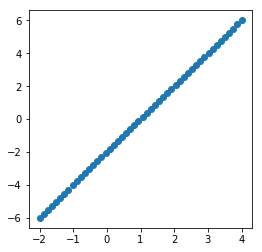

In [3]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pkg_resources import parse_version

%matplotlib inline
#@test {"output": "ignore"}
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()


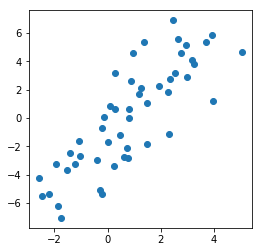

In [4]:
#@test {"output": "ignore"}
X += np.random.randn(2, num_examples)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

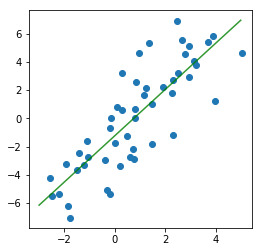

In [5]:

#@test {"output": "ignore"}
weights = np.polyfit(X[0], X[1], 1)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
line_x_range = (-3, 5)
plt.plot(line_x_range, [weights[1] + a * weights[0] for a in line_x_range], "g", alpha=0.8)
plt.show()

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: decodestring() is a deprecated alias since Python 3.1, use decodebytes()
  This is separate from the ipykernel package so we can avoid doing imports until


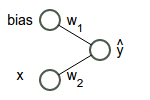

In [6]:
from IPython.display import Image
import base64
Image(data=base64.decodestring("iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAAO90lEQVR4Xu2dT5Dc1J3Hv+YQT8VJZUhVdprLWs4FTSrGGv4ql9CuHBCH4GaTFCLZwnIcjOAy8l6Q/1SlU4XHcg6xJgtY2OOik2KxSGoTGWrXzYFC2T2MDAtWitRavmQ0e9k2SYGowom4hNRPtqA9TE+rW3/cPfPepcfup6f3fu/Tv9/T+/PVpo8//vhjsMQsULAFNjGwCrYoKy6xAAOLgVCKBRhYpZiVFcrAYgyUYgEGVilmZYUysBgDpViAgVWKWVmhDCzGQCkWGEuwrly5gtf++zW887/vYOn/lnD5T5cT40x9ZQrb/nEbxDtFiHeI2LJlSylGY4X2t8BYgUVAvfzqy3i5/TI+vPLhmq37wpYv4AHpATxw3wMMsP4cFJ5jbMAiqA4eOYg/Lv8xMcL26e34+vTXk8+vbv1q8n/03TsX38EfLv4h+aRE380dmmNwFY7O2gWOBVgE1Y/2/yjxUls+vwXaY1oS7tZK3v94MJ8zceUvV0Dea+H4AoOrQrhGHqxuT0Xjp0P7D2HqH6Yymejyu5dx5PiRZBxGnmt+bj7TdSxTfgv0ASuAzglwmyE8pfbZu3VaEDkDdT+AweevzGolvPjvL+LMb84knmr+yHxmqNKyCK7ZQ7OJ5yIo+3m6clqx8UrNB1bso2W64FQN9cnijdcdAvNAQWGRPBcLicX3Ua8S84FVcj3PnjuLhRcWkgH63OG5XHc7+NTBZEBP47NvffNbucpiF/e3QCaw2g0NfNvES5c+wtQ9u2G0LCj8BLAiFEaeBU0zYJ9fxkfYjKl7FZgtCzIHIA7QUmXov/g9LmMztt6rwLBMyFROj3TkZ0fgveXh4X96GN//zvf7t2aNHGlI7VlW0pYmRC+AKUwAsQu5thOuvIjQEjGBGJ7CQYptdOw6etc6VzXXzcUZwJrGseWt2P28DV2I4OgyDgQKFgMTYtQ1xqq10eDuR6j8Fi1NxGTkwpAfRos7h05bQscQIFgibEeHMBHCVhs4EBtY8lQQd6ulvbN78e6f302mC7Z/bXsuo9NkKk1X9PZ+IUyeR0sN4GscYl8DPzOP5VuPYynQwMU+dL4O3wzRbpQQ93O1bvQuzgRWS0p/tQA6Nuqcilq7A5u3Px28T7qw7BB1VUHqhEKTB2+pCAIVHZVD3dPgujpE6peOBzesQRS5nr/+b//g24nF7JN27qkCGq/J++RknHXm5JlVeiKGr/MQPQMdV0ZkCRBbNUwEMYzQhRyZEHgHOv29ynPM6HXtja1Rf7B4AZ7RgZv+SuMAOj+NtrYEX3avfyqMfDi2DdcLEAQBvPOX8MGtR3Ex0MEFJiRxP373wWZsvaeBhixDVRrg1/jxlwEWPV3ap+xVrR57Cjgpht2xEDV4mLIFvqkiaoUwwzp4U4Hv9/awN7YrR+vuGcAS4ZsdtKV0VNEFVqMLrIkWJGEPPP4hKA0RgiCAc1XsdJQErGQ2Ig7hOQ5sx4Hz0u+wvHX2akjtMWCpNhQCiCicq+AcCx1Fh9B2IegcNN6B4Teg1z0EeknzKqPFRe7a9AeLm4ajXvzUoJEDqUahMESrKxSqbQHbDBGLoXUNlBiuUsNOT8fFQEVsNdHmdOjStTgSGOCnLTQuBDBosLxKqnTwntw/glPnoHMS4E6iFVjgbBGcwUGMPAjtawP73GZf/wVkAutYtAvPezYUPoKjipBdGZ5vQOgavGteHbfsiXD09TZUIUbg6JD3vITlrU/iYthErPOYaQk44ZhocDF8U0HDqsEOHfQaC7/2X68lyzJVTjd0WiJu2XMem++7+tAxSd52+hguTe3GYtjq6V3XPyqDtbA/WLyAtqRg0rHhLceo3avCsk0kjqd7uoEL0FJkaC/9Hh/gS9ixS0dTCaDKHVidNhoTNN2gQP/FedAmly/t2IWm2YK2xswqDbj3antzz5oToD/915/i5smbcdo8vfaDQGiC37YfEyeW4KtcMu2g1HbCrp9Dx5Fw3ZCw04ZSb0Jse6CsLH1qgZFfK0znn+hpznzKHGpJRzus4YJ/AX/78G94ofUC7r777pwMxAhdE6pyAK8u78CJJZ+BtcKiIw8Wea0DTx34ZCH5oHYwM1y0TjhnziXbaWgB+4cP/RCPPfYYtm/fjpMnT+Kmm24aDrDYhdpoQdAbaMtNSB4Da6UhRx4sqnB3SCTPNbtvtu9iMoU/Wg5Kt9p0h8DTp09j3759ePrpp/H4448PB1fylOtC5jTUGVifseFYgJXClXou+jcN6Gk2nj7JG1Gi7TG0Hkiz7OlGP/ru6OGjq46rnnjiCSwuLibe66677hocMAZWT5uNDVgpXGfbZ5OtybQNZq1EE6G0NXmXtGvNwbrv+4n3uu222wYPjwys9QFW2goKjbQ4Tdth6CAFeSpK5J3oQMUwhynS8PjMM89AVdVs3ouBtb7Aytbrw+WiMZfnednCIwOLgTUIZml43LFjB5577rnhnx4Huek6yztWY6yqbb+wsJBMTwwUHquu5Ijej4GVoWMoPJ4/fz7xXkM9PWa4x3rLwsDK2KMXLlxIvBeFR5qe2LRpU8YrN2Y2BtaA/U7hkaYnnn322exPjwPeYz1kZ2AN2YtpeCTvdeeddw5Zyvq9jIGVo28pPJL3ok2NLDxeb0gGVg6w0kvT8HjixIlkHJY1lauaE8GRangwsvD/noKqt+kzsLJSkCEfzdi/8cYbifdaKzxWoppDmxJ5FT54NH06YZShAQVmYWAVaEwqKg2PMzMzyfTEyqfHqlRzAoOH6OqwJnXoNQeBSWcjq0sMrJJsferUqSQsdofHylRzYg8aLyG0QtiTOvhGhFZglyKD0Mt8DKySwEqLpfD45ptvYn5+Hr/+z19/sukwj2pOP72vyJXBy4BNME340Pg6AiNAu8IDkQysksGi4t9++2189wffxee++DkIO4TcqjlrSw504Eg81FobYetq+KOwKDgagjVOnRdtBgZW0RZdpbw0BL73/nv4yZM/6bv7tVeVxkk1h4FVAVgbUTWHgVUBWGUcvCVV6EP/cuiztQ9NCNsMiIshrPSIeaK3oUNIlXQqaDMDqwIjlyEV0Fv6MoQlbENT/FTIhWSXOF2AF5jocei8cCswsAo36WcLLEPchO7yyr+9smrt6TQ3geQmcgcd2CQbIHoIDKGyuSwG1joEi06oU+jj3RAWR2HQgFiiTuxqJmRgVQBWGaGQDo78/OjPe9T+qpfSeBeeqIM3JPip4k8F7aVbMLAqMHSlg/dr7YkcCZxWg1Jz0G5UL7/EwKoArBuhmoNEbupBvPrRDhxf8qFVLFrCwKoArFQi4P3o/VwTpCmgdBi3r2oOIrQbNdwfGljytZ46r2U1n4FVlmW7yn3rrbfwvX/+XrKkMyPM5FLNIS2KbCrSNI8loKX48G6AxhIDq2SwaIcDgWWaJn71H78qRDWnlxbF1aaQxJILj6TRjRhm0L4hYrwMrJLAos1+BBXtyaLty5SKVs1Zverx1RB4dhIPPe/CVioeXF2rFAOrYLDIOxFQd9xxRwLVytSt90XfFaGaU3ATCimOgVWIGa8WkoY9AorA6pUIrqJVcwpsRiFFMbAKMONqYS9LsWWo5mS5bxV5GFg5rExhj8ZPdHBitbCXo+ixv5SBNWQXpmGPvNXtt98+ZCnr9zIG1oB9O2zYG/A2Y5+dgZWxC1nYy2goNt2Q3VA0jqIDESzsZbcZ81hr2CoNe/T56KOPZrcqy8m2zazGAAt7+X8ZzGOtsCELe/mhohLGEqwyVFpY2CsGqLSUsQKrDJUWFvaKBWrswCpDpYWFvXKgKiYUxh5U/huwhd8idBqYRARX4bHTldd8Le8gTSpapYWWX0is47qnveTdi02I6aFOejlAbSdcOT2fF8NTOEixDTqnV6Uk0CC2GpW8hYTCyFXA72yj8XoAAzoE+nsxgNnrZc8DtL7bU9HJlDwqLY9855FkbY8ktS3LWlGLECbPo6UG8DUOsa+Bn5nH8q3HsRRo4GISL6vDN0O0e70SdoB2rfeshYBF71Juyzzu90TcF59FIC8WJvSVvgiT9nnPH5nP/K7CtOPonYWzh2aTF2Fu+usmvPjLF3us7cXwdR6iZ6DjyogsAWKrhokghhG6kCMTAu9Ap7+r1l0cQwoLAote4+ugwT+IsxO78XrQKkTkqzsEkqeily8Nk0il5cfHfowv3/xlLBxf6Pk2sNhTwEkx7I6FqMHDlC3wTRVRK4QZ1sGbCnxfrfxgwjBtvtHXFAZW7OsQZo7hEm7Fkxf8nm+mH6TBlau0RG00OBWcY6Gj6BDaLgSdDn46MPwG9Hr15/MGsdco5S0GrDiAIU7D5M/AgIo9gY6Lng4+5wi3jIOea59wieCQzgEnAe4kWoEFzhbBGRzEyIPQDmBWpaoxSpQMUZdCwCLh1OlmDWcCBzJsSNzDiIyL8LR8Ur1lHE2nPeZzh+d6mooENW7Zcx6b7zuHTlvCJB1Nnz6GS1O7sUhKxDl/LEP00Vhekh8sUjThNUyYAdxr59dCSwSvAWbg5Xq7exkqLfRO6TMnz/TurNAEv20/Jk4swaf2xC6U2k7Y9XPoOBIm6crYh6UoaLodABOoSU3YlpLbQ48lQT0qnR+sEq1RBlj0dGmfsnPVOtB51IMmfEdGLQ7RkkSYkps8VbJ01QIjDdaNCIVZwOi4DnxOgsRRXIzhazwakY3gmphsljLWe56RBqv6wfvg3R0HFqS6CcHxC5kQHrwGo3nFSIN1Q1RaBuinyDchSyYmDRcthWPLPF22G2mwuo+k55kgHUylJRtZoa1A0kI0bAdGPRnSszQuYFE90yUdepoznzKHWtLRDmsglZY8cHZTE7UVCGqEpmtDScZZLK20wEh7LKpst9YBKQUf1A5mhovWCefMuU9eM9JbWnEQMAIY/DQOXLr+mqmHXkfIdj18YpSRByuFa6+2F1f+cgXkuWb3zfZdN6Twt/DCQuKpsgmVDQIXy9vPAmMB1krPRf9eryot/TpsXL4fG7BSuNa7Ssu4gNOvnmMFVtqY9azS0q/DxuX7sQRrXIy7kevJwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3Ixf9d0NIelzdt4X5AAAAAElFTkSuQmCC".encode('utf-8')), embed=True)

Here is the TensorFlow code for this simple neural network and the results

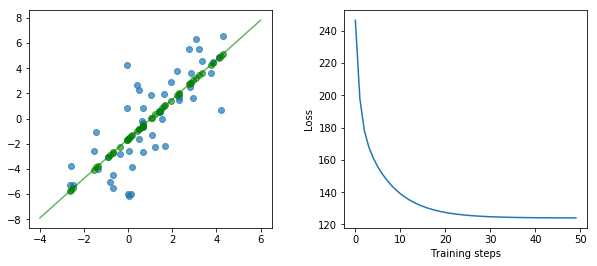

In [7]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pkg_resources import parse_version

%matplotlib inline

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

losses = []
training_steps = 50
learning_rate = 0.002

with tf.Session() as sess:
    # Set up all the tensors, variables, and operations.
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    if parse_version(tf.__version__) >= parse_version('0.12'):
        tf.global_variables_initializer().run()
    else:
        tf.initialize_all_variables().run()

    yhat = tf.matmul(input, weights)
    yerror = tf.subtract(yhat, target)
    loss = tf.nn.l2_loss(yerror)
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        update_weights.run()
        losses.append(loss.eval())

    # Training is done, get the final values for the graphs
    betas = weights.eval()
    yhat = yhat.eval()

# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()